# Entregável 03 - Turing Academy

#### Nome: Mariana Souza Silva

link do enunciado (com dataset): https://docs.google.com/document/d/1CQFp25sCyrXsWO8Qj9HqXVk_TmAF7tNLstLsHy2sSzs/edit?usp=sharing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("dataset3.psv", delimiter = '|')

# Limpeza de Dados

In [4]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1.0,48,3.0,17,0,NaN,0
54804,74592,Operations,region_27,Master's & above,f,other,1.0,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1.0,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1.0,29,1.0,2,0,45.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    employee_id          54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       49962 non-null  float64
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    47350 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.4+ MB


In [6]:
df.isna().mean()*100 #porcentagem de valores nulos para cada coluna

 employee_id             0.000000
department               0.000000
region                   0.000000
education                4.395344
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          8.841775
age                      0.000000
previous_year_rating     7.524449
length_of_service        0.000000
awards_won?              0.000000
avg_training_score      13.607503
is_promoted              0.000000
dtype: float64

In [7]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,49962.000000,54808.000000,50684.000000,54808.000000,54808.000000,47350.000000,54808.000000
mean,39195.830627,1.256475,273.521530,3.329256,5.865512,0.023172,63.514213,0.085170
std,22586.581449,0.612734,5422.563711,1.259993,4.265094,0.150450,13.492071,0.279137
min,1.000000,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [8]:
df = df.drop(columns=[' employee_id'])

In [9]:
df.drop_duplicates(inplace=True, ignore_index=True)

### Coluna "department" 

In [10]:
df.department.value_counts() #categoria inválida - substiuição pela moda

Sales & Marketing     16630
Operations            11204
Technology             7073
Procurement            7034
Analytics              5322
Finance                2505
HR                     2386
Legal                  1002
R&D                     999
quem trouxe quenga       25
Name: department, dtype: int64

In [11]:
df.department = df.department.replace({'quem trouxe quenga' : df.department.mode()[0]})

### Coluna "region"

In [12]:
df.region.unique() #região inválida - substituição pela moda

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18',
       'casa da lu na suecia'], dtype=object)

In [13]:
mask = df.region != 'casa da lu na suecia'
df.region = df.region.replace({'casa da lu na suecia': df[mask].region.mode()[0]})

In [14]:
df.region = df.region.str.replace('region_', '')
df.region = df.region.astype(int)

### Coluna "education"

In [15]:
df.education.value_counts(dropna=False)

Bachelor's          36183
Master's & above    14859
NaN                  2381
Below Secondary       757
Name: education, dtype: int64

In [16]:
df.education = df.education.fillna(df.education.mode()[0])

### Coluna "gender"

In [17]:
df.gender.value_counts(dropna=False) #typos e categorias inválidas

m                                   34782
f                                   15348
MALE                                 3255
fEMALE                                571
eu sou homem hetero homossexual!      224
Name: gender, dtype: int64

In [18]:
df.gender = df.gender.str.upper()

In [19]:
df.gender = df.gender.replace({'FEMALE' : 'F', 'MALE' : 'M'})

In [20]:
mask2 = df.gender != 'EU SOU HOMEM HETERO HOMOSSEXUAL!'
df.gender = df.gender.replace({'EU SOU HOMEM HETERO HOMOSSEXUAL!' : df[mask2].gender.mode()[0]})

### Coluna "recruitment_channel"

In [21]:
df.recruitment_channel.unique() #sem nulos, categorias ok

array(['sourcing', 'other', 'referred'], dtype=object)

### Coluna "no_of_trainings"

In [22]:
df['no_of_trainings'].unique()

array([ 1.,  2., nan,  3.,  4.,  7.,  5.,  6.,  8., 10.,  9.])

In [23]:
df['no_of_trainings'] = df['no_of_trainings'].fillna(int(df['no_of_trainings'].mean()))

### Coluna "age" 

In [24]:
df.age.unique() #temos valores negativos e valores inválidos (123456)

array([    35,     30,     34,     39,     45,     31,     33,     28,
           32,     49,     37,     38,     41,     27,     29,     26,
           24,     57,     40,     42,     23,     59,     44,     50,
           56,     20,     25,     47,     36,     46,     60,     43,
           22,     54,     58, 123456,     48,     53,     55,     51,
           52,     21,    -32], dtype=int64)

In [25]:
def modulo(x):
    if x < 0:
        return -x
    else:
        return x

In [26]:
df.age = df.age.apply(modulo)
df.age = df.age.replace(123456, int(df[df.age != 123456].mean()[0]))

C:\Users\junbi\AppData\Local\Temp\ipykernel_7420\3957973626.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.age = df.age.replace(123456, int(df[df.age != 123456].mean()[0]))


### Coluna "previous_year_rating"

In [27]:
df['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [28]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0]) 

### Coluna "lenght_of_service"

In [29]:
df['length_of_service'].unique()

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

### Coluna "awards_won?"

In [30]:
df['awards_won?'].value_counts(dropna=False)

0    52910
1     1270
Name: awards_won?, dtype: int64

### Coluna "avg_training_score"

In [31]:
df['avg_training_score'].unique()

array([49., 60., 50., 73., 85., 59., 63., 83., 54., 77., 80., 84., 51.,
       46., nan, 57., 70., 68., 79., 44., 72., 61., 48., 58., 87., 47.,
       52., 88., 71., 65., 62., 53., 75., 78., 91., 82., 69., 74., 90.,
       86., 92., 67., 89., 56., 76., 81., 45., 39., 94., 93., 64., 66.,
       42., 96., 40., 55., 99., 43., 95., 97., 41., 98.])

In [32]:
df['avg_training_score'] = df['avg_training_score'].fillna(df['avg_training_score'].mean())

# Análise de Dados

## Análise de Features

### Tempo de Trabalho

In [33]:
(df['length_of_service'].value_counts()/df.shape[0]*100).sort_index() #porcentagem de empregados em cada tempo de serviço

1      7.988188
2     12.190845
3     12.894057
4     12.526763
5     10.668143
6      8.678479
7     10.127353
8      5.278701
9      4.822813
10     4.019934
11     1.685124
12     1.450720
13     1.258767
14     1.007752
15     1.087117
16     1.005906
17     0.791805
18     0.717977
19     0.607235
20     0.236250
21     0.143965
22     0.112588
23     0.119970
24     0.129199
25     0.094131
26     0.075674
27     0.066445
28     0.055371
29     0.055371
30     0.022148
31     0.036914
32     0.018457
33     0.016611
34     0.007383
37     0.001846
Name: length_of_service, dtype: float64

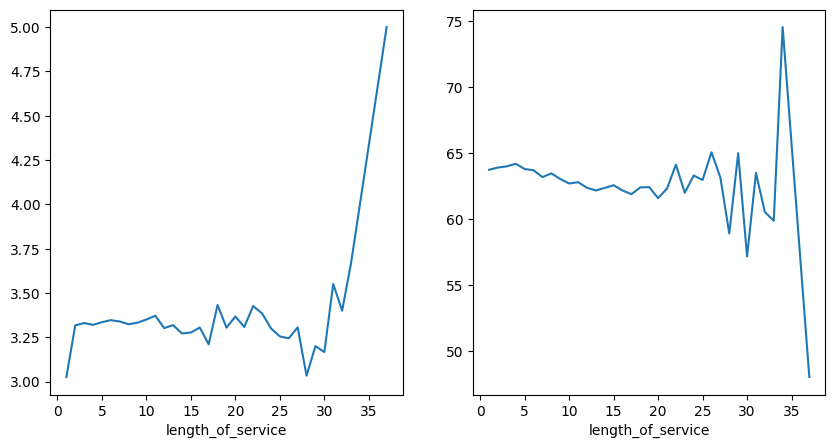

In [34]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
df.groupby('length_of_service')['previous_year_rating'].mean().plot()

plt.subplot(1, 2, 2)
df.groupby('length_of_service')['avg_training_score'].mean().plot()

plt.show()

Até cerca de 15 anos de trabalho temos muitos empregados e podemos ver uma estabilização da média deles em 3,3 e 63,5. A partir disso, a quantidade deles começa a diminuir drasticamente, e vemos, então, maior variação nas médias. Por conta desse comportamento devemos ser cautelosos ao fazermos suposições para esse segundo grupo em relação a essa feature, uma vez que ela pode não representar um comportamento generalizado.

### Gênero

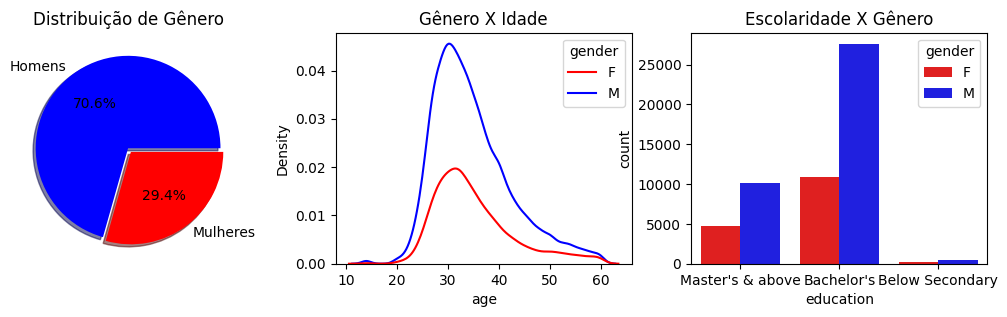

In [35]:
plt.figure(figsize=(13, 3))   
plt.subplot(1, 3, 1)
plt.title('Distribuição de Gênero') 
plt.pie(df.gender.value_counts(), autopct="%.1f%%", shadow = True, 
        labels=['Homens', 'Mulheres'], explode =[0, 0.05], colors=['blue', 'red'])

plt.subplot(1, 3, 2)
plt.title("Gênero X Idade")
sns.kdeplot(data=df, x='age', hue='gender', palette={'F': 'red', 'M': 'blue'})


plt.subplot(1, 3, 3)
sns.countplot(data=df, x='education', hue='gender', palette = ['Red', 'Blue'])
plt.title('Escolaridade X Gênero')
plt.show()

Vemos uma distribuição desigual de gênero na empresa (gráfico 1), onde homens estão mais que o dobro presentes em relação a mulheres.

Além disso, vemos que se concentram empregados mais velhos e experientes na empresa (gráfico 2), com mais que 25 anos e concentrados sobretudo na casa dos 30. Isso também vai de acordo com a distribuição de escolaridade dos empregados (gráfico 3), onde praticamente todos são altamente educados.

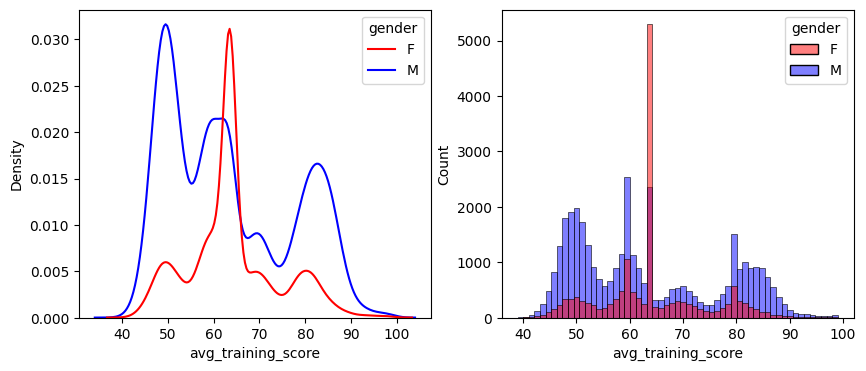

In [36]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(x='avg_training_score', data=df, hue='gender', palette={'F': 'red', 'M': 'blue'})
plt.subplot(1, 2, 2)
sns.histplot(x='avg_training_score', data=df, hue='gender', palette={'F': 'red', 'M': 'blue'})
plt.show()

Ainda vemos nesses dois gráficos que as mulheres se concentram excepcionalmente em cerca de 64 pontos nos treinamentos, enquanto os homens não apresentam esse comportamento, apresentando maior variância.

### Número de Treinamentos

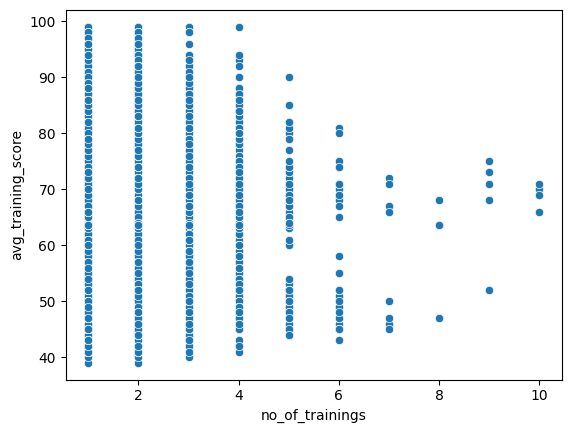

In [37]:
sns.scatterplot(data=df, x='no_of_trainings', y='avg_training_score')
plt.show()

In [38]:
df['avg_training_score'].mean()

63.52978601573601

Vemos que uma enorme quantidade de treinamentos não significa um grande aumento na nota dos empregados - acima de 4 treinamentos as notas apenas tendem a convergir para valores próximos à média geral (cerca de 63.5)

### Departamento

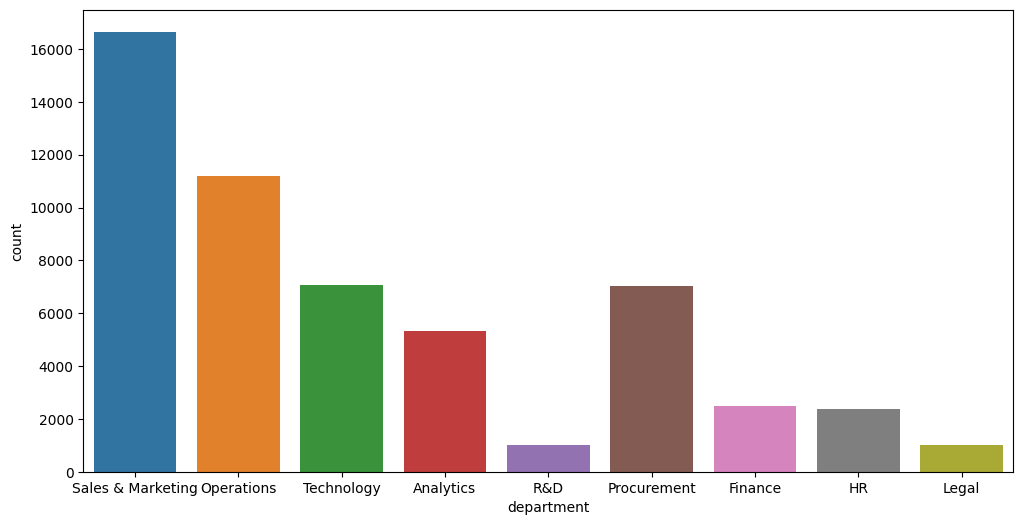

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='department')
plt.show()

Vemos onde mais se concentram os empregados da empresa (Marketing e Vendas) e onde menos se concentram (P&D).

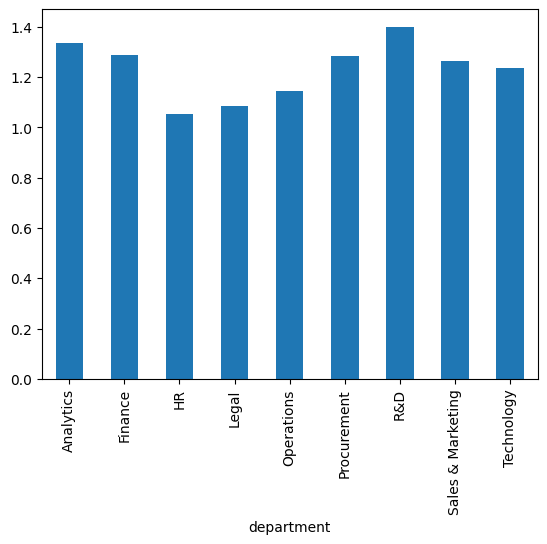

In [40]:
df.groupby('department')['no_of_trainings'].mean().plot(kind='bar')
plt.show()

Vemos que as médias de treinamentos por departamento são bem parecidas, com a menor sendo de RH e a maior, P&D.

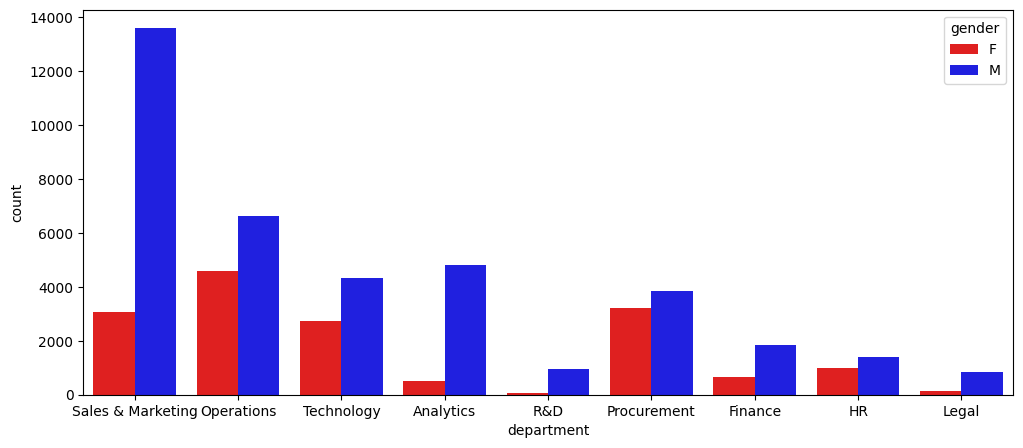

In [41]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='department', hue='gender', palette=['Red', 'Blue'])
plt.show()

Acima vemos a dostribuição de gênero por departamento, onde algumas áreas praticamente não apresentam mulheres, além de acentuarem a diferença nas porcentagens de participação dos dois gêneros (P&D, Legal e Análises).


Em contraponto, algumas áreas suavizam essa diferença, com maior atuação de mulheres (Procurement, Operations e Technology)

### Prêmios

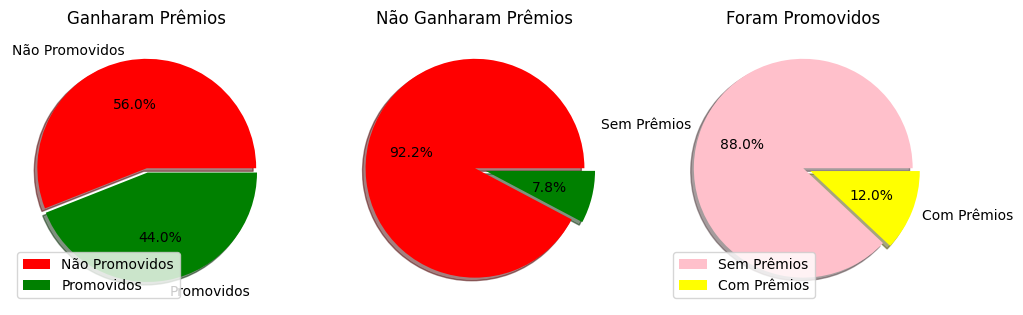

In [42]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.pie(df[df['awards_won?']==1]['is_promoted'].value_counts(), labels=['Não Promovidos', 'Promovidos'], 
        colors=['Red', 'Green'], autopct = '%.1f%%', shadow=True, explode =[0, 0.04])
plt.title('Ganharam Prêmios')
plt.legend()

plt.subplot(1, 3, 2)
plt.pie(df[df['awards_won?']==0]['is_promoted'].value_counts(), colors=['Red', 'Green'], autopct = '%.1f%%',
        shadow=True, explode =[0, 0.1])
plt.title('Não Ganharam Prêmios')

plt.subplot(1, 3, 3)
plt.pie(df[df['is_promoted']==1]['awards_won?'].value_counts(), labels=['Sem Prêmios', 'Com Prêmios'],
        colors=['Pink', 'Yellow'], explode =[0, 0.07], autopct = '%.1f%%', shadow=True)
plt.title('Foram Promovidos')
plt.legend(loc='lower left')

plt.show()

O primeiro gráfico mostra que boa parte de quem ganhou prêmios foi promovida.

O segundo gráfico mostra que poucos dos que não ganharam prêmios foram promovidos.

Já o terceiro gráfico indica que dos que foram promovidos, ainda foram relativamente poucos os que obtiveram prêmios.

Assim, infere-se que poucos dos que são aprovados têm histórico de premiação, mas ter premiação aumenta significativamente as chances de ser promvido.

### Canal de Recrutamento

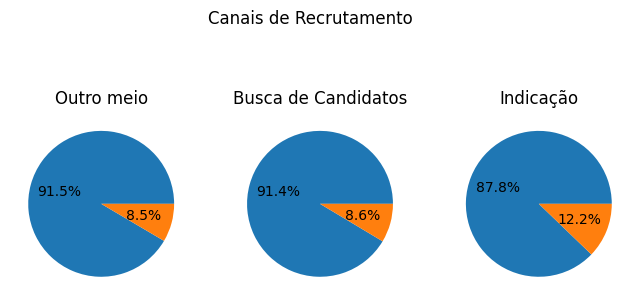

In [43]:
plt.figure(figsize=(8, 4))
plt.suptitle('Canais de Recrutamento')
plt.subplot(1, 3, 1)
mask = df['recruitment_channel'] == 'other'
plt.pie(df[mask]['is_promoted'].value_counts(), autopct='%.1f%%')
plt.title('Outro meio')

plt.subplot(1, 3, 2)
mask = df['recruitment_channel'] == 'sourcing'
plt.pie(df[mask]['is_promoted'].value_counts(), autopct='%.1f%%')
plt.title('Busca de Candidatos')

plt.subplot(1, 3, 3)
mask = df['recruitment_channel'] == 'referred'
plt.pie(df[mask]['is_promoted'].value_counts(), autopct='%.1f%%')
plt.title('Indicação')

plt.show()

Vemos pelos gráficos que empregados que entraram na empresa por indicação de alguém têm uma taxa de promoção um pouco maior que os demais.

### Nota Média de Treinamento

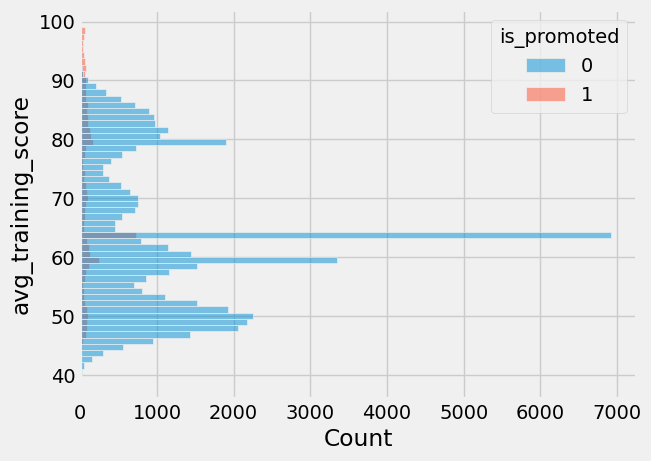

In [44]:
plt.style.use('fivethirtyeight')
sns.histplot(y='avg_training_score', data=df, hue='is_promoted')
plt.show()

Devido à concentração de muitas médias na casa dos 65 pontos, temos uma pequena concentração dos promovidos também nessa região. Fora isso, as quantidades de promoções parecem estar igualmente distribuídas pelas notas. No entanto, vemos que com o aumento das notas (acima de 85), a quantidade relativa de promoções por nota aumenta drasticametne - enquanto isso, para uma mesma quantidade de aprovados com notas na casa dos 50, há muito mais não aprovados.

Podemos, assim, deduzir que um candidato com notas altíssimas tem maiores chances de ser promovido.

### Avaliação passada

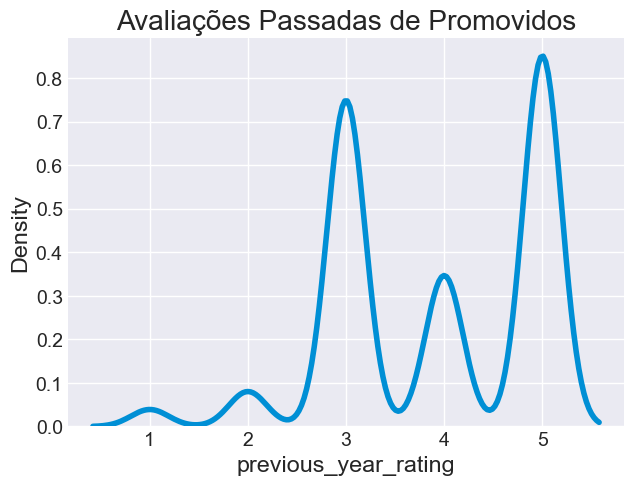

In [47]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.kdeplot(data=df[df['is_promoted'] == 1], x='previous_year_rating')
plt.title('Avaliações Passadas de Promovidos')
plt.show()

Vê-se uma concentração dos aprovados em notas maiores ou iguais a 3. Também vemos, como antes, uma grande concentração de aprovados onde há uma concentração enorme das médias (3). Desconsiderando esse aumento súbito explicado, há uma tendência de crescimento de promoções por nota, que pode ser melhor vista nesses gráficos de quantidade relativa:

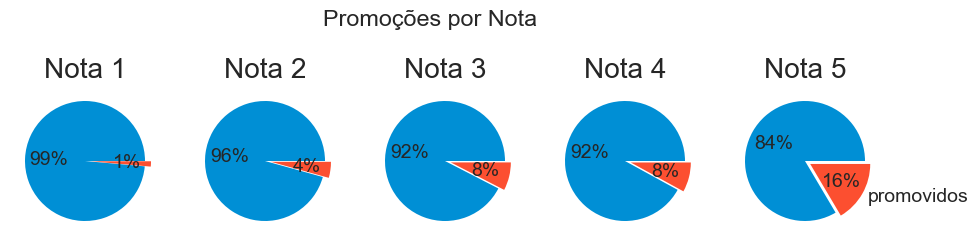

In [48]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 3))
plt.suptitle('Promoções por Nota')
plt.subplot(1, 5, 1)
plt.pie( df[ df['previous_year_rating'] == 1 ]['is_promoted'].value_counts(), autopct='%.0f%%', explode=[0, 0.1])
plt.title('Nota 1')
plt.subplot(1, 5, 2)
plt.pie( df[ df['previous_year_rating'] == 2 ]['is_promoted'].value_counts(), autopct='%.0f%%', explode=[0, 0.1])
plt.title('Nota 2')
plt.subplot(1, 5, 3)
plt.pie( df[ df['previous_year_rating'] == 3 ]['is_promoted'].value_counts(), autopct='%.0f%%', explode=[0, 0.1])
plt.title('Nota 3')
plt.subplot(1, 5, 4)
plt.pie( df[ df['previous_year_rating'] == 4 ]['is_promoted'].value_counts(), autopct='%.0f%%', explode=[0, 0.1])
plt.title('Nota 4')
plt.subplot(1, 5, 5)
plt.pie( df[ df['previous_year_rating'] == 5 ]['is_promoted'].value_counts(), autopct='%.0f%%', explode=[0, 0.1], labels = ['', 'promovidos'])
plt.title('Nota 5')
plt.show()

### Conclusões

- Quanto ao perfil social da empresa, podemos ver a enorme predominância de homens em detrimento de mulheres. Essa desigualdade tanto aumenta quanto diminui muito quando olhamos a distribuição de gênero por departamento, onde há áreas com partipação quase nula de mulheres e outras onde os dois gêneros quase se igualam.

- Ainda vimos como um maior número de treinamentos não necessariamente implica uma nota de treinamento maior. 

- Temos 3 fatores que influenciam positivamente na promoção de empregados: se ele ganhou prêmios, sua avaliação do ano passado e sua avaliação nos últimos treinamentos

- Um funcionário que ganhou prêmios no passado tem maiores chances de ser promovido do que um que não ganhou - o que não significa que a maioria dos promovidos tem histórico de premiações.

- Quanto maiores as notas no trabalho e nos treinamentos, também são maiores as chances de ser promovido.

# Pré-processamento

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [52]:
df.info()
#categorical features: department, region, gender e recruitment channel (não ordenadas) e education (ordenada);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54180 entries, 0 to 54179
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54180 non-null  object 
 1   region                54180 non-null  int32  
 2   education             54180 non-null  object 
 3   gender                54180 non-null  object 
 4   recruitment_channel   54180 non-null  object 
 5   no_of_trainings       54180 non-null  float64
 6   age                   54180 non-null  int64  
 7   previous_year_rating  54180 non-null  float64
 8   length_of_service     54180 non-null  int64  
 9   awards_won?           54180 non-null  int64  
 10  avg_training_score    54180 non-null  float64
 11  is_promoted           54180 non-null  int64  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 4.8+ MB


In [53]:
#podemos descartar a feature region?
(df.groupby('region')['is_promoted'].value_counts()/df.groupby('region')['is_promoted'].count()*100)
#porcentagem de promoções por região - há uma pequena variação nas taxas - não levaremos region em conta no modelo;

region  is_promoted
1       0              90.491803
        1               9.508197
2       0              91.754474
        1               8.245526
3       0              89.306358
                         ...    
32      1               4.246285
33      0              96.282528
        1               3.717472
34      0              97.212544
        1               2.787456
Name: is_promoted, Length: 68, dtype: float64

In [54]:
df.drop('region', axis=1, inplace=True)

### One-Hot Encoding

In [55]:
ohe = OneHotEncoder(sparse_output=False)
is_male = pd.DataFrame(ohe.fit_transform(df.gender.values.reshape(-1, 1)), columns = ohe.get_feature_names_out(['gender']))['gender_M']

In [56]:
df['is_male'] = is_male

In [57]:
df = df.drop('gender', axis=1)

In [58]:
x = pd.DataFrame(ohe.fit_transform(df[['department', 'recruitment_channel']]), columns = ohe.get_feature_names_out())

In [59]:
df = pd.concat([df, x], axis=1).drop(['department', 'recruitment_channel'], axis=1)

### Ordinal Encoding

In [60]:
categories = df.education.unique()
oe = OrdinalEncoder(categories = [categories])

In [61]:
education = oe.fit_transform(df.education.values.reshape(-1, 1))

In [62]:
df.education = pd.Series(education.ravel())

### Min-Max Scaling (Normalization)

In [63]:
scaler = MinMaxScaler()

In [64]:
to_be_scaled = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score']

In [65]:
scaled = pd.DataFrame(scaler.fit_transform(df[to_be_scaled]), columns = scaler.get_feature_names_out())

In [66]:
df[to_be_scaled] = scaled

### Train-Test Spliting

In [67]:
X = df.drop('is_promoted', axis=1)

In [68]:
y = df['is_promoted']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 18)

# Modelo de Classificação - KNN'

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [71]:
neighbors = np.arange(1, 20)
training_score = np.empty(len(neighbors))
testing_score = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_score[i] = accuracy_score(y_train, knn.predict(X_train))
    testing_score[i] = accuracy_score(y_test, knn.predict(X_test))

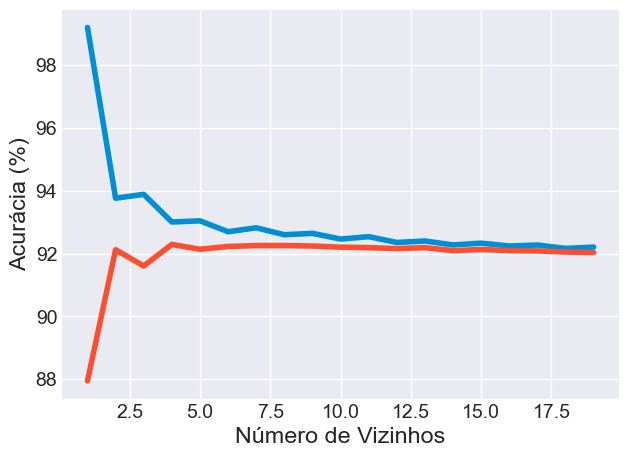

In [72]:
plt.plot(neighbors, training_score*100)
plt.plot(neighbors, testing_score*100)
plt.xlabel('Número de Vizinhos')
plt.ylabel('Acurácia (%)')
plt.show()

A partir do gráfico, vemos que cerca de 7 ou 8 vizinhos para o modelo é o suficiente para uma boa acurácia

In [73]:
df['is_promoted'].mean()*100  

8.60280546327058

No entanto, também vemos que apenas 8,6% dos empregados do dataset são promovidos - os dados estão **desbalanceados**. Assim, usar *acurácia* como métrica não é uma boa ideia.

### Precisão e Recall

In [74]:
precision_scores = np.empty(len(neighbors))
recall_scores = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predicao = knn.predict(X_test)
    precision_scores[i] = precision_score(y_test, predicao, average='micro')
    recall_scores[i] = recall_score(y_test, predicao, average='micro')

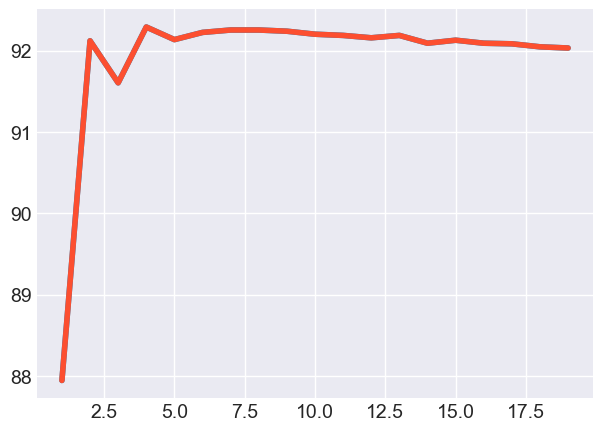

In [75]:
plt.plot(neighbors, precision_scores*100)
plt.plot(neighbors, recall_scores*100)
plt.show()
# precision e recall são iguais

Vemos que a partir de 8 vizinhos o modelo tende a se estabilizar em 91% de Precisão e Recall. 91% de Precisão indica que 91% dos empregados que foram classificados como promovidos realmente foram, enquanto que 91% de Recall mostra que 91% dos empregados promovidos também foram classificados como promovidos.